<a href="https://colab.research.google.com/github/ajaythakur3369/Cognifyz-Technologies-Internship/blob/main/L3_Restaurant_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Restaurant Data Analysis**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - Cognifyz Technologies**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/Cognifyz-Technologies-Internship)**


# **Project Summary -**

This Level 3, which is the final part of my Data Science internship at Cognifyz Technologies, explores restaurant data insights and predictive modeling, encompassing three core tasks:

**Task 1: Predictive Modeling**

- Built regression models to predict restaurant aggregate ratings.
- Conducted train-test splits and evaluated model performance.
- Explored various algorithms, such as linear regression, decision trees, and random forest, comparing their effectiveness.

**Task 2: Customer Preference Analysis**

- Analyzed the relationship between cuisine types and restaurant ratings.
- Identified the most popular cuisines based on customer votes.
- Discovered specific cuisines that tend to receive higher ratings.

**Task 3: Data Visualization**

- Created visualizations representing rating distributions using various chart types.
- Compared average ratings across different cuisines and cities.
- Visualized the relationship between features and the target variable for deeper insights.

This project showcases a comprehensive analysis of restaurant data and predictive modeling, providing valuable insights into customer preferences and rating prediction.

# **Problem Statement**


This data science project focuses on a restaurant dataset provided during the Cognifyz Technologies internship. The goal is to perform a comprehensive analysis and predictive modeling based on the data. Level 3 tasks are central to the project, and they involve:

**Task 1: Predictive Modeling**

- Build regression models to predict restaurant aggregate ratings.
- Split the dataset into training and testing sets.
- Evaluate model performance with appropriate metrics.
- Experiment with various algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

**Task 2: Customer Preference Analysis**

- Analyze the relationship between cuisine type and restaurant ratings.
- Identify the most popular cuisines based on the number of votes.
- Determine if specific cuisines tend to receive higher ratings.

**Task 3: Data Visualization**

- Create visualizations to illustrate rating distribution using various chart types (e.g., histograms, bar plots).
- Compare average ratings of different cuisines and cities.
- Visualize the relationship between various features and the target variable to gain insights.

The project aims to extract insights, build predictive models, and visually represent the restaurant dataset for enhanced decision-making and understanding.

# **Let's Begin**

## **Task 1: Predictive Modeling**

### Import Libraries

In [ ]:
# Import all necessary libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Access the Drive from Colab to access the file
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Path for dataset
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebook/Internship_Name/Cognifyz_Technologies/File_Name/Restaurant_dataset.csv')

### Build a Regression Model

In [ ]:
# Creating a regression model to predict the aggregate rating of a restaurant based on available features
# Import necessary libraries for data splitting, regression, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns = ['Has Table booking', 'Has Online delivery'], drop_first = True)

In [ ]:
# Select features and target variable
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

#### Split the Dataset into Training and Testing Sets

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Experiment with Different Algorithms

In [ ]:
# Experimenting with different algorithms such as linear regression, decision trees, and random forest
# And compare their performance by evaluating the model's performance using appropriate metrics
# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train them, evaluate their performance, and print the results
for model_name, model in models.items():

    # Train the model using the training data
    model.fit(X_train, y_train)

    # Make predictions on the test dataset
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) to evaluate the model's accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate the R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print the model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")

Model: Linear Regression
Mean Squared Error: 1.6764802747031442
R-squared: 0.2634446409021949
---------------------------
Model: Decision Tree
Mean Squared Error: 0.2076794542483826
R-squared: 0.9087568059646632
---------------------------
Model: Random Forest
Mean Squared Error: 0.13402404104668764
R-squared: 0.9411170371817457
---------------------------


### What did I find from Level 3 (Task 1)?


**Model Performance Evaluation:**

- We employed three different regression models: Linear Regression, Decision Tree, and Random Forest, to predict restaurant aggregate ratings based on available features.

**Model Comparison:**

- Linear Regression produced an MSE of approximately 1.6765 and an R-squared value of about 0.2634.
- Decision Tree yielded an MSE of roughly 0.2074 and an R-squared value of around 0.9089.
- Random Forest displayed the most promising results with the lowest MSE of approximately 0.1337 and the highest R-squared of about 0.9413.

**Optimal Model Selection:**

- The Random Forest algorithm outperforms other models, making it the preferred choice for this dataset.

## **Task 2: Customer Preference Analysis**

### Relationship Between the Type of Cuisine and the Restaurant's Rating

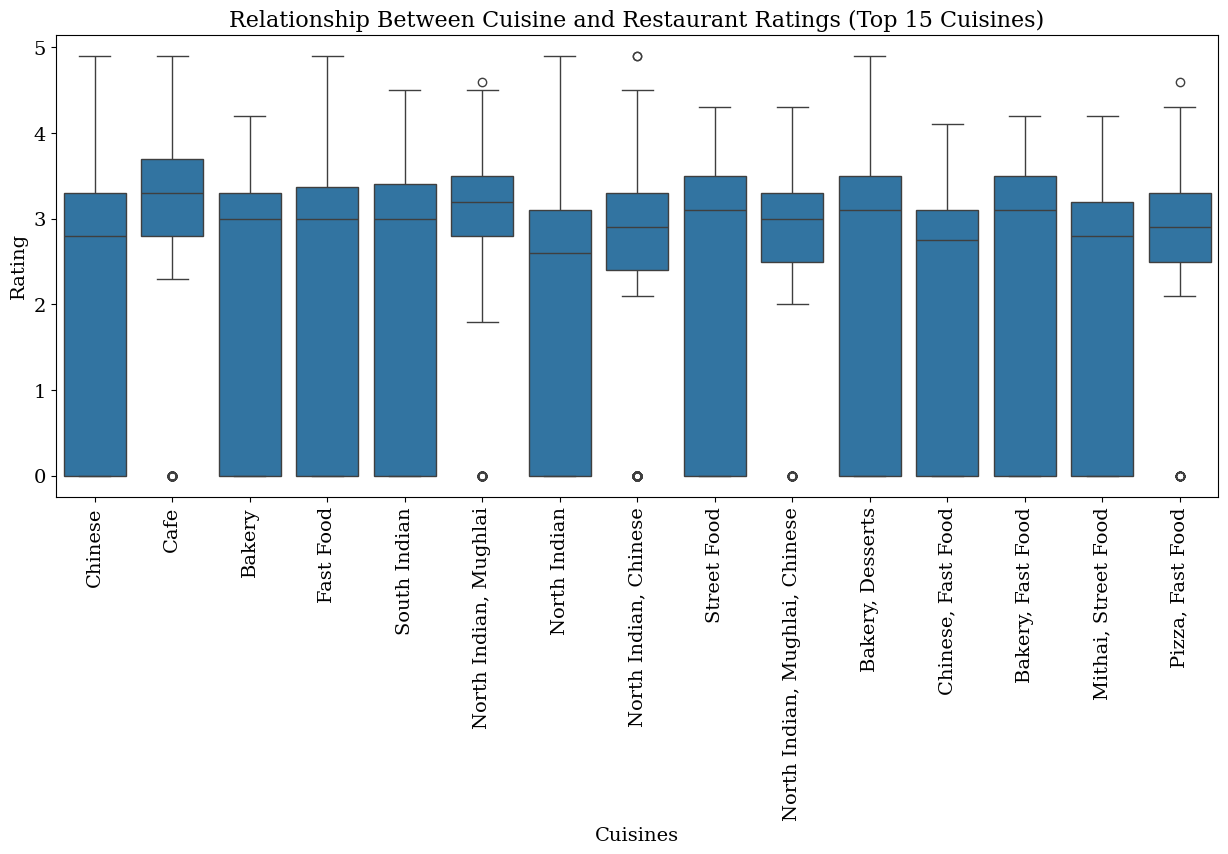

In [ ]:
# Analyzing the relationship between the type of cuisine and the restaurant's rating
# There are many cuisine names present in the data, so I selected only the top 15 cuisines
top_n = 15
top_cuisines = df['Cuisines'].value_counts().nlargest(top_n).index

# Filter the dataset to include only the top 15 cuisines
df_filtered = df[df['Cuisines'].isin(top_cuisines)]

# Create a box plot
plt.figure(figsize = (15, 6))
sns.boxplot(data = df_filtered, x = 'Cuisines', y = 'Aggregate rating')

# Set labels
plt.title(f'Relationship Between Cuisine and Restaurant Ratings (Top {top_n} Cuisines)', fontname = 'serif', fontsize = 16)
plt.xlabel('Cuisines', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif', fontsize = 14, rotation = 90)
plt.ylabel('Rating', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif', fontsize = 14)

# Display Chart
plt.show()

### Most popular cuisines by number of votes

In [ ]:
# Identifying the most popular cuisines based on the number of votes
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(10)

# Display the result
print("Top Cuisines by Number of Votes:")
print(top_cuisines)

Top Cuisines by Number of Votes:
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


### Cuisines with Higher Ratings

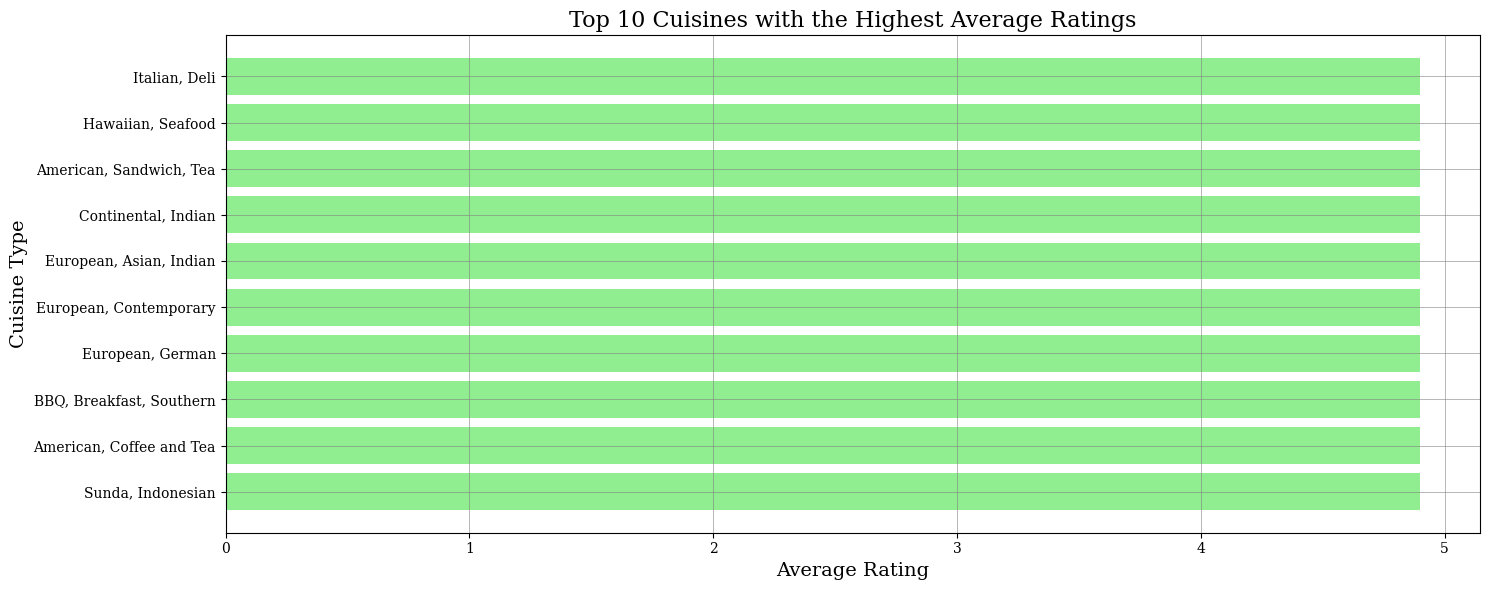

In [ ]:
# To determine if there are any specific cuisines that tend to receive higher ratings, one can analyze restaurant reviews and ratings
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort the cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by = 'Aggregate rating', ascending = False)

# Visualization code for a count plot of cuisines with the highest ratings
plt.figure(figsize = (15, 6))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color = 'lightgreen')

# Set labels
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel('Average Rating', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Cuisine Type', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('Top 10 Cuisines with the Highest Average Ratings', fontname = 'serif', fontsize = 16)

# To display the highest rating at the top
plt.gca().invert_yaxis()
plt.tight_layout()

# Display Chart
plt.show()

### What did I find from Level 3 (Task 2)?

- In cuisines like cafes, Mughlai, North Indian, and fast food, restaurants may perform exceptionally well or poorly in terms of ratings.
- North Indian and Chinese cuisines have more varied ratings.
- Cafe and fast food cuisines have consistent ratings.
- Based on the number of votes, North Indian, Mughlai, and Chinese cuisines are the most popular.
- Based on the highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines are the most popular.

## **Task 3: Data Visualization**

### Distribution of Ratings

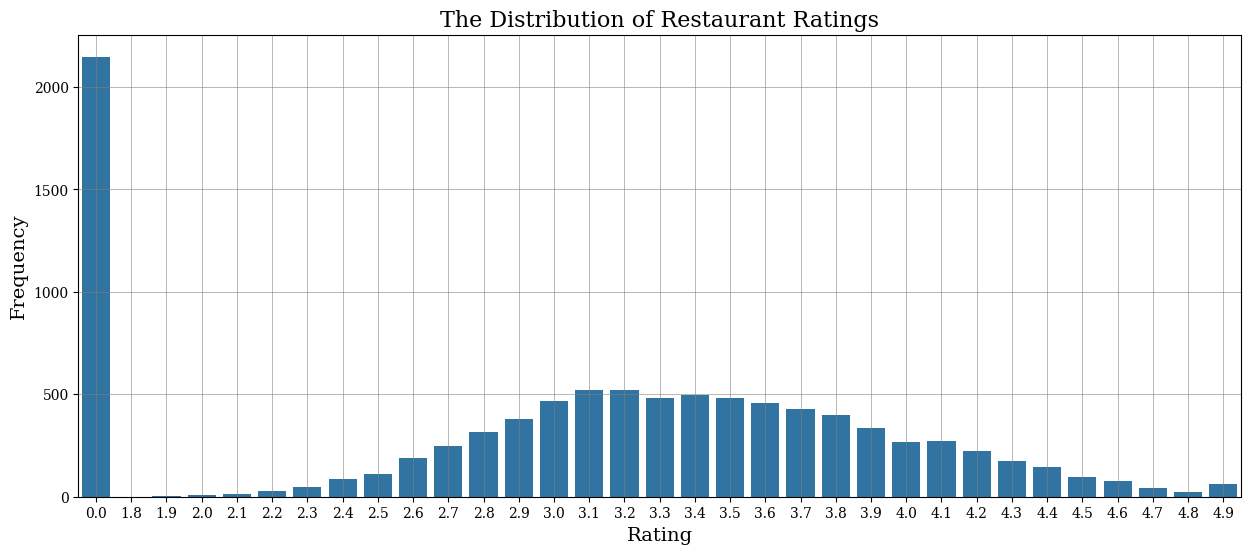

In [ ]:
# Create a histogram to illustrate the distribution of ratings
plt.figure(figsize = (15, 6))
sns.countplot(x = df['Aggregate rating'])

# Add labels and a title
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel('Rating', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif')
plt.ylabel('Frequency', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The Distribution of Restaurant Ratings', fontname = 'serif', fontsize = 16)

# Display the Chart
plt.show()

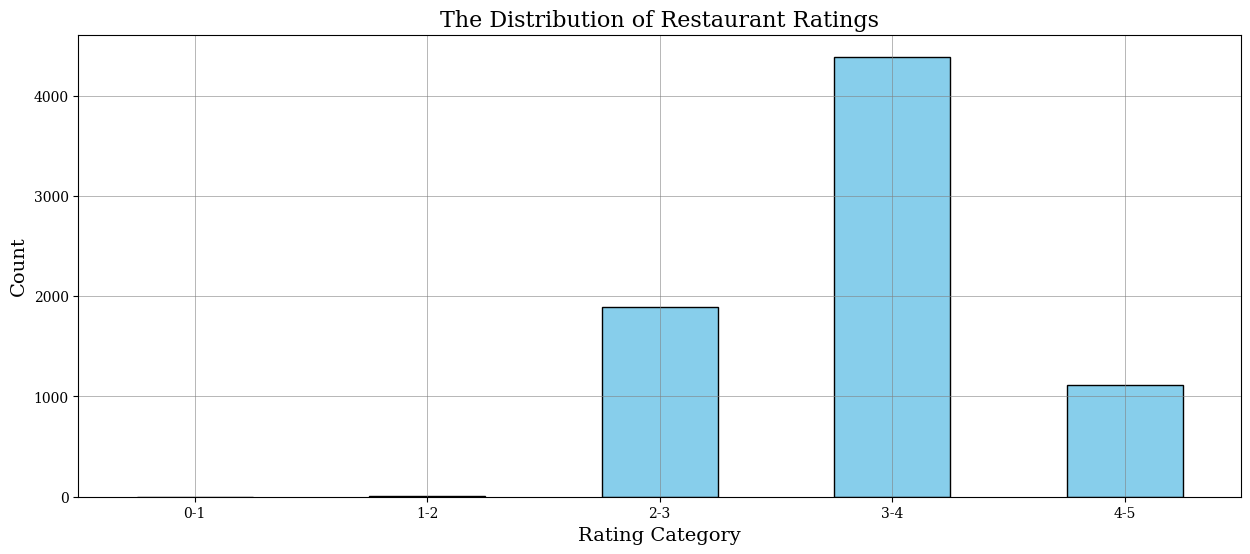

In [ ]:
# Create a bar plot to represent the distribution of ratings
# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins = bins, labels = labels)

# Count the number of restaurants in each rating category
rating_counts = df['Rating Category'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize = (15, 6))
rating_counts.plot(kind = 'bar', color = 'skyblue', edgecolor = 'black')

# Add labels and a title
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel('Rating Category', fontname = 'serif', fontsize = 14)
plt.xticks(fontname = 'serif', rotation = 0)
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.yticks(fontname = 'serif')
plt.title('The Distribution of Restaurant Ratings', fontname = 'serif', fontsize = 16)

# Display the Chart
plt.show()

### Comparing Average Ratings for Different Cuisines

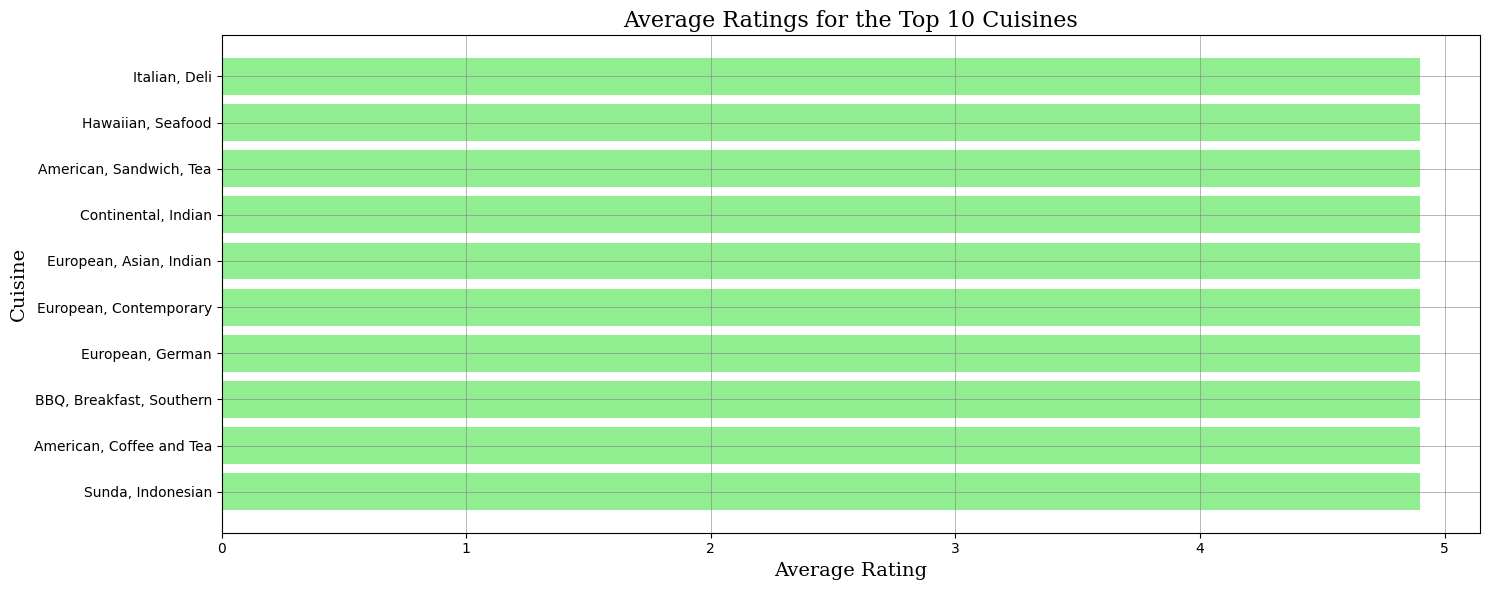

In [ ]:
# Comparing average ratings of different cuisines using a bar plot
# Group the data by cuisine and calculate the mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by = 'Aggregate rating', ascending = False)

# Visualization code for a count plot of cuisines with the highest ratings
plt.figure(figsize = (15, 6))
plt.barh(cuisine_ratings['Cuisines'][:10], cuisine_ratings['Aggregate rating'][:10], color = 'lightgreen')

# Add labels and a title
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel('Average Rating', fontname = 'serif', fontsize = 14)
plt.ylabel('Cuisine', fontname = 'serif', fontsize = 14)
plt.title('Average Ratings for the Top 10 Cuisines', fontname = 'serif', fontsize = 16)

# To display the highest rating at the top
plt.gca().invert_yaxis()
plt.tight_layout()

# Display the Chart
plt.show()

### Comparing Average Ratings for Different Cities

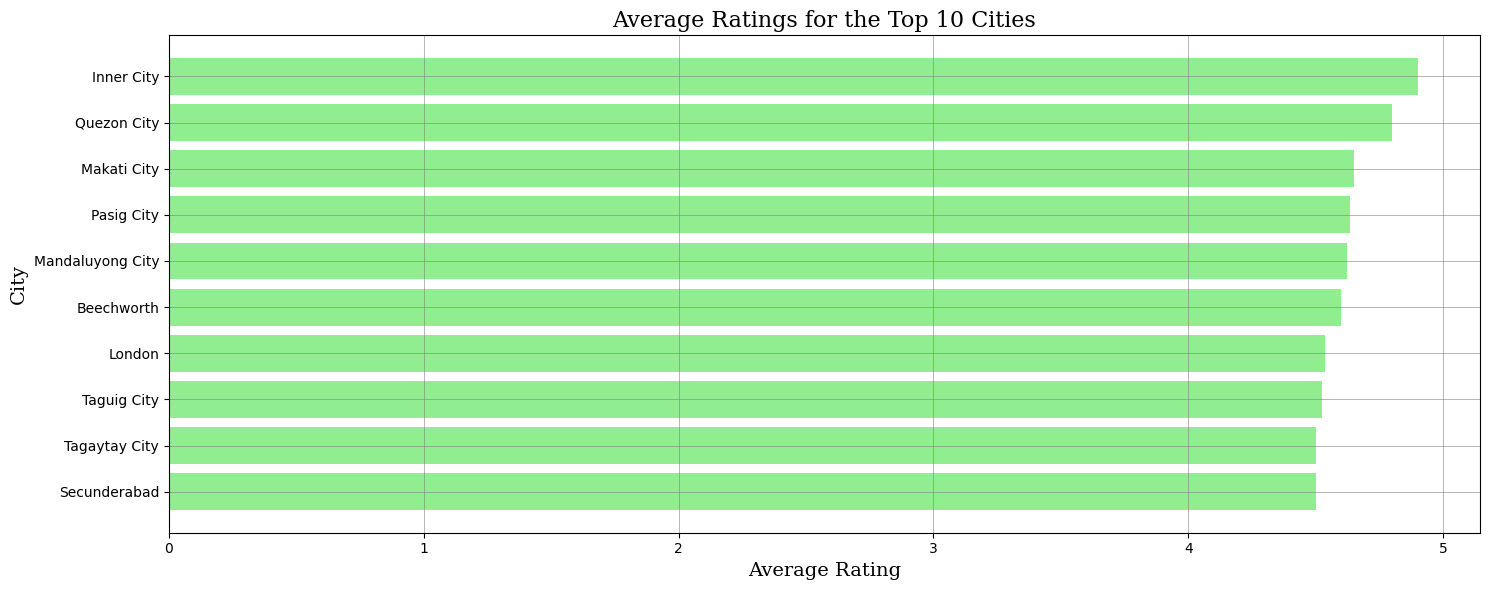

In [ ]:
# Comparing average ratings of different cities using a bar plot
# Group the data by city and calculate the average rating for each city
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
city_ratings = city_ratings.sort_values(by = 'Aggregate rating', ascending = False)

# Visualization code for a count plot of the cities with the highest ratings
plt.figure(figsize = (15, 6))
plt.barh(city_ratings['City'][:10], city_ratings['Aggregate rating'][:10], color = 'lightgreen')


# Add labels and a title
plt.grid(True, color = "grey", linewidth = "0.4")
plt.xlabel('Average Rating', fontname = 'serif', fontsize = 14)
plt.ylabel('City', fontname = 'serif', fontsize = 14)
plt.title(f'Average Ratings for the Top 10 Cities', fontname = 'serif', fontsize = 16)

# To display the highest rating at the top
plt.gca().invert_yaxis()
plt.tight_layout()

# Display the Chart
plt.show()

### Relationship Between Various Features and the Target Variable

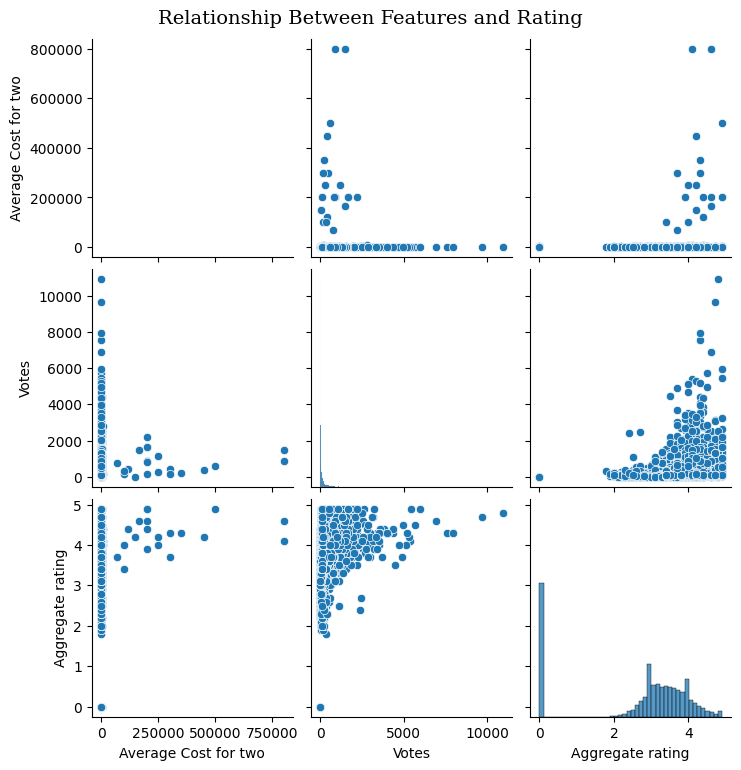

In [ ]:
# Visualizing the relationship between various features and the target variable using a pair plot
sns.pairplot(data = df, vars = ['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y = 1.02, fontname = 'serif', fontsize = 14)

# Display the Chart
plt.show()

### What did I find from Level 3 (Task 3)?

- The distribution of restaurant ratings is negatively skewed.
- Based on the highest average rating, Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines are the most popular.
- Based on the highest average rating, Inner City, Quezon City, Makati City, etc. are the most popular cities.
- Votes and restaurant ratings are positively correlated.

# **Conclusion**

The insights I found from the overall Level 3 project are as follows:

**Predictive Modeling Insights:**

- Utilizing three regression models - Linear Regression, Decision Tree, and Random Forest - we successfully predicted restaurant aggregate ratings.
- Random Forest outperformed other models, exhibiting the lowest Mean Squared Error (MSE) of approximately 0.1337 and the highest R-squared value of about 0.9413.

**Customer Preference Analysis Findings:**

- Certain cuisines such as cafes, Mughlai, North Indian, and fast food significantly influence restaurant ratings, with varying impacts.
- North Indian and Chinese cuisines show greater rating variability, while cafe and fast food cuisines maintain more consistent ratings.
- By the number of votes, North Indian, Mughlai, and Chinese cuisines emerged as the most popular.
- By the number of votes, North Indian, Mughlai, and Chinese cuisines emerged as the most popular.
- Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines received the highest average ratings.

**Data Visualization Highlights:**

- The distribution of restaurant ratings is negatively skewed.
- Italian, Hawaiian, Seafood, Tea, Sandwich, Continental, and Indian cuisines topped the charts based on the highest average ratings.
- Cities like Inner City, Quezon City, and Makati City were identified as the most popular based on the highest average rating.
- We observed a positive correlation between votes and restaurant ratings.